In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
import category_encoders as ce

In [2]:
DATA_FOLDER = "/Users/pangyujin/Downloads/cifar-100-python/"

In [3]:
from tensorflow.keras.datasets import cifar100

In [4]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')
x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [5]:
# convert class vectors to binary class matrices
num_classes = 100
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
def build_model():
    model = keras.Sequential([
        layers.Dense(512, activation='relu', input_shape=(3072,)),
        layers.Dropout(0.1),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.1),
        layers.Dense(num_classes, activation='softmax')
    ])

    optimizer = tf.keras.optimizers.RMSprop()

    model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
    return model

In [7]:
model = build_model()

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               51300     
Total params: 1,887,332
Trainable params: 1,887,332
Non-trainable params: 0
_________________________________________________________________


In [9]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 200

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)


batch_size = 128
history = model.fit(
  x_train, y_train, batch_size = batch_size,
  epochs=EPOCHS, verbose=0, validation_data=(x_test, y_test),
  callbacks=[early_stop, PrintDot()])


.............................................

In [10]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
40,3.161114,0.24010,3.453334,0.2070,40
41,3.148966,0.24060,3.498855,0.2092,41
42,3.148599,0.24186,3.432686,0.1991,42
43,3.151140,0.24076,3.575669,0.1932,43
44,3.157223,0.24046,3.546233,0.1943,44


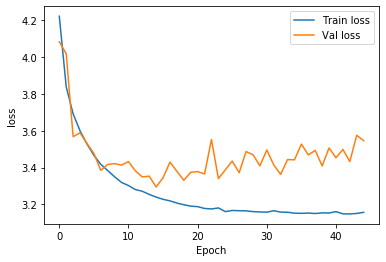

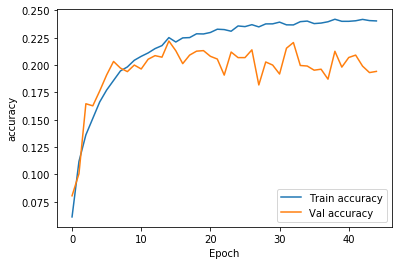

In [11]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'],
           label='Train loss')
    plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val loss')
    # plt.ylim([0,5])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'],
           label='Train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'],
           label = 'Val accuracy')
  # plt.ylim([0,20])
    plt.legend()
    plt.show()


plot_history(history)

200epochs no early-stop  
train acc: 0.563950  
val acc: 0.1519  
